## Load the data

In [ ]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
import zipfile

# unzip file
zip_file_path = '/content/SOCOFing.zip'
extracted_path = 'extracted_socofing'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extracted_path)

## Compare Augmentation

In [ ]:
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

In [ ]:
baseline_model = keras.models.load_model("baseline_resnet50.keras")
augmented_model = keras.models.load_model("augmented_resnet50.keras")
print("Models loaded successfully.")

Models loaded successfully.


In [ ]:
import importlib
import data_utils
import os
import tensorflow as tf
import numpy as np

importlib.reload(data_utils)

organized_dataset_path = 'organized_fingerprint_dataset'
test_dir = os.path.join(organized_dataset_path, 'test')

image_size = (224, 224)
batch_size = 10

_, test_ds, class_names = data_utils.create_image_datasets(
    test_dir,
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle_train=False,
    shuffle_test=False
)

AUTOTUNE = tf.data.AUTOTUNE
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
true_labels = np.concatenate([y.numpy() for x, y in test_ds], axis=0)
true_labels = true_labels.astype(np.int64)

print("Test dataset loaded and prepared.")
print(f"Number of test samples: {len(true_labels)}")

Found 40 files belonging to 2 classes.
Found 40 files belonging to 2 classes.
Class names: ['Altered', 'Real']
Test dataset loaded and prepared.
Number of test samples: 40


In [ ]:
# Generate predictions for the baseline model
baseline_predictions = baseline_model.predict(test_ds)

# Generate predictions for the augmented model
augmented_predictions = augmented_model.predict(test_ds)

baseline_probabilities = tf.sigmoid(baseline_predictions).numpy()
augmented_probabilities = tf.sigmoid(augmented_predictions).numpy()

print(f"Shape of baseline predictions: {baseline_predictions.shape}")
print(f"Shape of augmented predictions: {augmented_predictions.shape}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
Shape of baseline predictions: (40, 1)
Shape of augmented predictions: (40, 1)


In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for the baseline model
fpr_baseline, tpr_baseline, _ = roc_curve(true_labels, baseline_probabilities)
roc_auc_baseline = auc(fpr_baseline, tpr_baseline)

# Calculate ROC curve and AUC for the augmented model
fpr_augmented, tpr_augmented, _ = roc_curve(true_labels, augmented_probabilities)
roc_auc_augmented = auc(fpr_augmented, tpr_augmented)

# Print AUC values
print(f"AUC for Baseline Model: {roc_auc_baseline:.4f}")
print(f"AUC for Augmented Model: {roc_auc_augmented:.4f}")

AUC for Baseline Model: 0.7675
AUC for Augmented Model: 0.7325


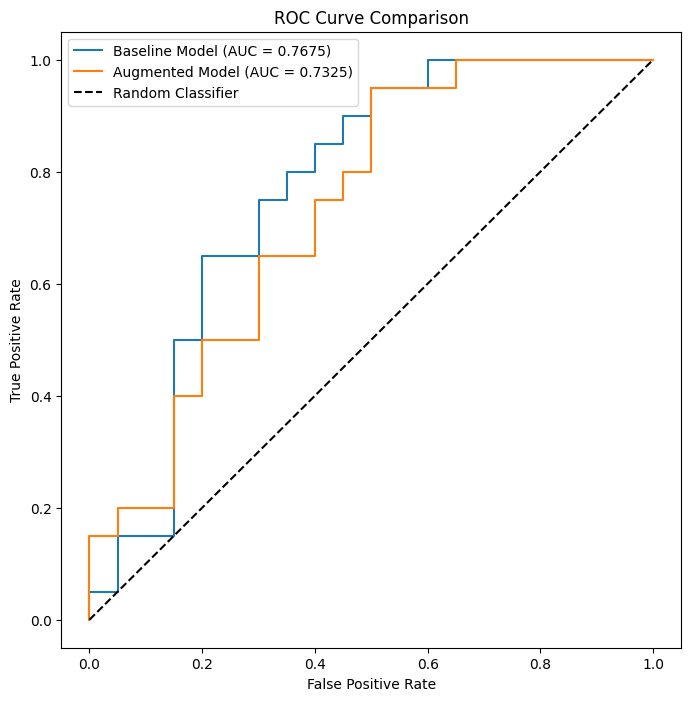

In [ ]:
plt.figure(figsize=(8, 8))

# Plot the ROC curve for the baseline model
plt.plot(fpr_baseline, tpr_baseline, label=f'Baseline Model (AUC = {roc_auc_baseline:.4f})')
# Plot the ROC curve for the augmented model
plt.plot(fpr_augmented, tpr_augmented, label=f'Augmented Model (AUC = {roc_auc_augmented:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

### Summary:

*   The baseline ResNet50 model achieved an AUC of 0.7675 on the test dataset.
*   The augmented ResNet50 model achieved an AUC of 0.7325 on the test dataset.
*   The ROC curve for the baseline model is positioned slightly above the ROC curve for the augmented model.
*   The model trained with the specific data augmentation applied in this case did not outperform the baseline model on this particular test dataset.